<a href="https://colab.research.google.com/github/Brritany/NLP-Term-Vocabulary-and-Preprocessing/blob/main/%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E7%9A%84%E8%A9%9E%E5%BD%99%E4%BB%A5%E5%8F%8A%E5%89%8D%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自然語言的詞彙以及前處理(Preprocessing)
# NLP-Term-Vocabulary-and-Preprocessing
___
## Author
> __Yong-Zhen, Huang__  
m946111005@tmu.edu.tw  
create on Sep 2022

___


# 1、課程內容
  * 文本的構成須具備那些元素?
  * 文字的資料該如何拆分
  * 前處理的作法及重要性


# 2、為什麼需要前處理(Preprocessing)
  * 過濾不必要的雜訊
  * 將重要資料highlight，使後續進入Learning model時效率更好

## 2-1 Data Representation

定義：把資料變成機器模型可以辨視的樣子**(資料→數字)**





## 2.2 Text Representation

定義：將Human Readable: Language轉換成Machine Readable: **Vector**

步驟：  
Step 1: 
> Collect the documents to be indexed.(收集文檔)

Step 2:  


> **Tokenize** the text.(標記文本)


> Do **linguistic preprocessing** of tokens.(對標記進行預處理)

Step 3
> **Index** the documents that each term occurs in.(透過標記好的語言進行索引)




## 2.3 Document Delineation and Parsing

Step 1: 確認文檔編碼機制，使用適當的解碼器
> ASCII/Unicode/vendor-specific standards.  
> Decode the bytes to a character sequence.

Step 2: 確認文檔格式

> 常見可處理格式為**.csv**, **.txt**, **.xml**  
> .pdf 為圖片格式需進行轉換  
> .word 雖為文檔，但無法直接使用

Step 3 文檔解析
> byte sequence → linear sequence of characters.

Step 4: 索引粒度(indexing granularity)
> 索引粒度會影響 IR/NLP/TM 性能   
> 如果單位太大，很難得到相關信息  
> 如果單位太小，用戶可能會因太多的回報而不知所措。 

## 2.4 Tokenization (標記)

定義：
> 將字符序列分割成片段，稱為標記  
> 同時丟棄某些不必要的字符，如標點符號



In [1]:
# Input: Friends, Romans, Countrymen, lend me your ears.
# Output: <Friends, Romans, Countrymen, lend, me, your, ears>

### 2.4.1 Token — type — term

Example: “to sleep perchance to dream”  
> 5 tokens: to, sleep, perchance, to, and dream.(將每一個單字都段開)  
> 4 types, since there are 2 instances of to.(去除重複的單字)  
> 3 terms, if to is omitted from the **index** as a **stopword**.(去掉不必要的介係詞等，僅納入要當成字典的詞彙)

### 2.4.2 n-gram (n元語法)

定義：指文本中連續出現的n個語詞。n元語法模型是基於(n-1)階馬爾可夫鏈的一種概率語言模型，通過n個語詞出現的概率來推斷語句的結構

當n分別為1、2、3時，又分別稱為**一元語法（unigram）**、**二元語法（bigram）**與**三元語法（trigram）**



```
to be or not to be

unigram:  to, be, or, not, to, be, 
bigram: to be, be or, or not, not to, to be,
tirgram: to be or, be or not, or not to, not to be, 
```



## 2.5 Chinese Segmentation Tool(中文斷詞器)

1. CKIP
2. [MONPA (Multi-Objective NER POS Annotator)](https://github.com/monpa-team/monpa)
3. Stanford Word Segmenter
4. [Jieba](https://github.com/fxsjy/jieba)

### MONPA 實作

In [2]:
!pip install monpa # 在colab中安裝MONPA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 5.2 MB/s 


In [3]:
import monpa
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
result = monpa.cut(sentence) # cut斷句
print(' '.join(result))

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.
蔡英文 總統 今天 受 邀 參加 台北市政府 所 舉辦 的 陽明山 馬拉松 比賽 。


In [4]:
import monpa
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
result = monpa.pseg(sentence) # pseg詞性
for item in result:
  print(item)

('蔡英文', 'PER')
('總統', 'Na')
('今天', 'Nd')
('受', 'P')
('邀', 'VF')
('參加', 'VC')
('台北市政府', 'ORG')
('所', 'D')
('舉辦', 'VC')
('的', 'DE')
('陽明山', 'LOC')
('馬拉松', 'Na')
('比賽', 'Na')
('。', 'PERIODCATEGORY')


In [5]:
# 建立自訂詞彙
# 詞彙 100 詞性(V, PER, VC, NER......)

#colab建立檔案(檔案名.格式名稱)
%%writefile userdict.txt

受邀 100 V
馬拉松比賽 100 NER

Writing userdict.txt


In [6]:
import monpa
monpa.load_userdict("./userdict.txt") # 匯入自訂詞彙路徑
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
result = monpa.pseg(sentence) # pseg詞性
for item in result:
  print(item) # 可以看到"受邀"及"馬拉松比賽"已經聯在一起

('蔡英文', 'PER')
('總統', 'Na')
('今天', 'Nd')
('受邀', 'V')
('參加', 'VC')
('台北市政府', 'ORG')
('所', 'D')
('舉辦', 'VC')
('的', 'DE')
('陽明山', 'LOC')
('馬拉松比賽', 'NER')
('。', 'PERIODCATEGORY')


### Jieba 實作(簡體中文做的)

In [7]:
!pip install jieba #colab安裝jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import jieba
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
print("Input:", sentence)
result = jieba.cut(sentence, cut_all = False)
print("Output 精確模式 Full mode:")
print(' '.join(result))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...


Input: 蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。
Output 精確模式 Full mode:


Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.990 seconds.
DEBUG:jieba:Loading model cost 0.990 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


蔡 英文 總統 今天 受邀 參加 台北市 政府 所舉 辦 的 陽明 山馬拉松 比賽 。


In [9]:
# 建立自訂詞彙
# 詞彙 1 詞性(V, PER, VC, NER......)

#colab建立檔案(檔案名.格式名稱)
%%writefile userdict1.txt

蔡英文 1 n
台北市政府 1 n
陽明山 1 n
馬拉松 1 n
所 1 n
舉辦 1 v

Writing userdict1.txt


In [10]:
import jieba
jieba.load_userdict("./userdict1.txt") # 匯入自訂詞彙路徑
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
print("Input:", sentence)
result = jieba.cut(sentence, cut_all = False)
print("Output 精確模式 Full mode:")
print(' '.join(result))

Input: 蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。
Output 精確模式 Full mode:
蔡英文 總統 今天 受邀 參加 台北市政府 所 舉辦 的 陽明山 馬拉松 比賽 。


In [11]:
import jieba
import jieba.posseg as pos #匯入詞性模組jieba.posseg，定義簡寫為pos
jieba.load_userdict("./userdict1.txt") # 匯入自訂詞彙路徑
sentence = "蔡英文總統今天受邀參加台北市政府所舉辦的陽明山馬拉松比賽。"
result = pos.cut(sentence) # pos.cut分析詞性
for word in result:
  print(word.word, word.flag)

蔡英文 n
總統 n
今天 t
受邀 v
參加 v
台北市政府 n
所 n
舉辦 v
的 uj
陽明山 n
馬拉松 n
比賽 vn
。 x


## 2.6 Stop Words

定義：
1. 一些常用詞（停用詞），在建立詞彙字典時可以被排除
> Example: a, an, and, are, as, ..., was, were, with, ...
2. 通常出現次數很多，可用**Sort the token**發現(排序)

常見stop word list  
• English Stop Words  
– http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words  
– http://www.ranks.nl/stopwords  
– http://xpo6.com/list-of-english-stop-words/  
– http://www.lextek.com/manuals/onix/stopwords1.html 


• Chinese Stop Words  
– http://www.ranks.nl/stopwords/chinese-stopwords  
– https://shelandy.blogspot.tw/2008/02/100.html  
– https://gist.github.com/dreampuf/5548203  


## 2.7 Normalization (特徵標準化)

定義：將兩種甚至多種單字/詞彙/複數型態/大小寫/同義詞等，將其合併/整合，方便後續機器學習時，增加效率

> Example:
>> ‘on-line’ and ‘online’.  
>> ‘USA’ and ‘U.S.A’.

英文方面：
1. 大小寫轉換(全部轉成同一類型)
2. 去除複數
3. 辨識縮寫，使其全部完成一致(Normalization)

手動建立同義詞(synonyms)：
> Example:
>> ‘car’ and ‘automobile’ belong to the same class.  
>> '台鐵' and '火車'  


### 2.7.1 Stemming and Lemmatization (詞幹/詞條提取)

緣由：在英文語句中，同一個單詞的拼法可能會隨著時態、單複數、主被動等狀況而有所改變，如 speaking / speak 或是 cats / cat，然而其所要表達的語意並沒有太大的不同。

定義：詞幹/詞條提取就是將單詞的不同型態歸一化，藉此來降低文本的複雜度。

> Example: car, cars, car’s, cars’ à car. → car

優點：
1. 降低文本單詞數量
2. 降低資料複雜度，加快模型訓練速度

缺點：
1. 失去部分訊息


#### 2.7.1.1 Stemming

定義：制定規則來拆解單詞(rule-based)，像是看到 ing/ed 就去除。其中，又以**Porter stemmer** 跟 **Snowball stemmer** 最為常見

**Porter stemmer**：運用現有的規則**移除常見單詞字尾(chops off the
ends of words)**

**Snowball stemmer**：根據使用者對 Porter stemmer 提出的問題加以優化。


【註】訓練模型時我們常會遇到 underfitting 或是 overfitting 的問題

**overstemming**：指去除太多字尾，導致剩餘的字根無法完整的表達原單詞的訊息，又或是不同語意的單詞經過處理後變為相同的字根
> Example：university, universal, universities, and universe，Stemming後都成為 univers

**understemming**：指字尾去除得不夠乾淨，同一個語意的單詞可能被拆解為不同的字根，不僅失去**stemming**的原意，還可能製造出更多意義不明的字根

【常用工具】  
• Porter’s stemmer:  
http://www.tartarus.org/~martin/PorterStemmer/  
• Lovins stemmer:  
http://www.cs.waikato.ac.nz/~eibe/stemmers/  
• Paice stemmer:  
http://www.comp.lancs.ac.uk/computing/research/stemming/  

#### 2.7.1.2 Lemmatization

定義：取出單詞的詞條、詞元、詞首等等，其意思為字的元型
> Example: ‘am’, ‘are’, ‘is’ à →‘be’.

## 2.8 Statistical Properties of Terms

解釋：在許多文本挖掘任務中，了解/估計術語M(the number of terms **M**)的數量是必要的

### 2.8.1 Heaps' law

Heaps' law: 用於估計術語的數量

$ M = kT^b $

> M：詞彙的數目  
> T：文檔集中詞條的個數(the number of token in the collection)  
> 30 <= k <= 100  
> b≈0.5


該定律表明**collection size and vocabulary size is linear in log-log space.**

【註】隨著T的數量增加，字典的大小將隨之變大

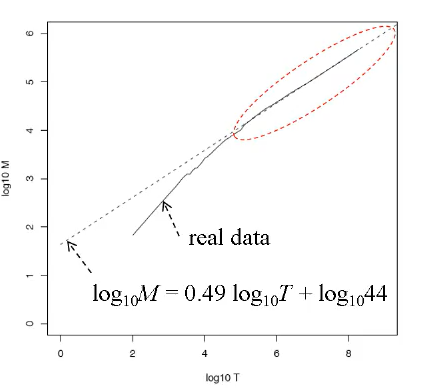

### 2.8.2 Zipf’s law

Zipf’s law: 詞彙在文檔的分布情形

$ cf_i \propto  \frac{1}{i} $  or  $ cf_i \ast i=c $

> c = constant 常數  
> f = frequency 頻率   
> **詞彙出現的頻率**會與**排名成倒數**  
> 排名第 $i$ 多的詞彙文檔集頻率與 $\frac{1}{i}$ 成正比

Example:
> 詞彙出現的頻率(Frequency) * 詞彙排名(Rank) = $ cf_i \ast i $


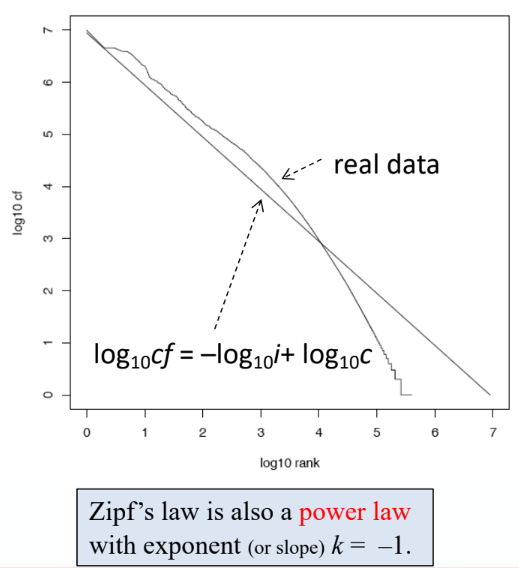

高頻出現的詞彙，不到20%，其餘詞彙皆屬於低頻詞 

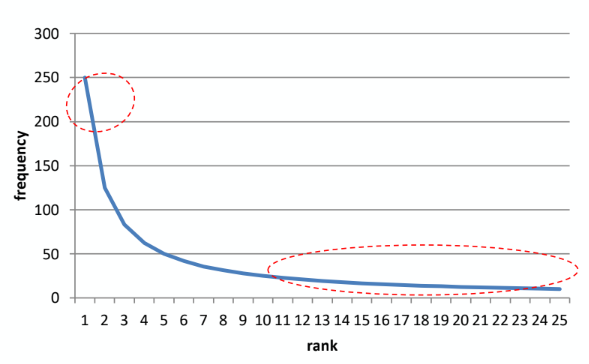

### 2.8.3 小結： Heaps' law & Zipf’s law

Heaps' law: 在給出的詞彙數目中，獨立的terms數量(vocabulary的size)v(n)大致上是詞彙量(n)的一個指數函數


Zipf’s law: 在給出的詞彙數目中，任意一個terms，其詞彙出現的頻率(Frequency)的與排名（Rank）相乘的值，大致上為一個常數

# 3、Text Preprocessing using NLTK

In [12]:
!pip install nltk # colab上安裝NLTK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 3.1 Split Sentences (拆分句子)

`from nltk.tokenize import sent_tokenize`

In [14]:
from nltk.tokenize import sent_tokenize

mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(sent_tokenize(mytext))

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


## 3.2 Tokenization (拆分單詞Token)

`from nltk.tokenize import word_tokenize`

In [15]:
from nltk.tokenize import word_tokenize

mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


## 3.3 Plot the curve of most frequent words in corpus

In [16]:
import requests
from bs4 import BeautifulSoup

url = 'https://edition.cnn.com/2022/09/04/business/uk-prime-minister-economy/index.html'
r = requests.get(url)
sp = BeautifulSoup(r.text, 'html.parser')

html = sp.find('div', class_="article__content") # 先找出所在區塊

with open('cnn_news.txt', 'w') as f:
    f.write(r.text)

繪製前30名出現的高頻詞彙

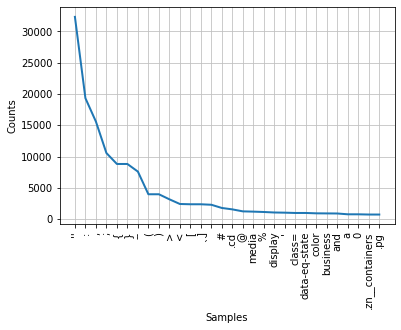

In [17]:
import nltk

f = open('cnn_news.txt')
inputfile = f.read()
tokens = nltk.tokenize.word_tokenize(inputfile)
fd = nltk.FreqDist(tokens)
fd.plot(30, cumulative = False)

Exclude the stopwords – download stopword list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


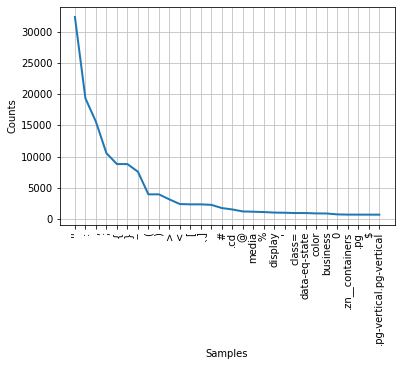

In [18]:
import nltk
nltk.download('stopwords') # 下載stopwords

from nltk.corpus import stopwords
f = open('cnn_news.txt')
inputfile = f.read()
tokens = []

for token in nltk.tokenize.word_tokenize(inputfile):
  if token not in stopwords.words('english'):
    tokens.append(token)
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative = False)